In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
X_features = pd.read_csv('df_cleaned.csv')
y_target = pd.read_csv('y_target.csv')

In [6]:
X = X_features.drop('Unnamed: 0', axis=1)
y = y_target.is_fraud

In [7]:
anomaly_inputs = ['hourly_basis', 'Age', 'category', 'amount_qt',
       'merchant', 'job', 'transaction_id']

In [8]:
from sklearn.ensemble import IsolationForest

model_IF = IsolationForest(n_estimators=100, max_samples=len(X), contamination=0.0058,random_state=42, verbose=0)
#X_train = np.array(X_features.values)
model_IF.fit(X)

C:\Users\Nima\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


IsolationForest(contamination=0.0058, max_samples=1296675, random_state=42)

In [9]:
X['anomaly_scores'] = model_IF.decision_function(X[anomaly_inputs])
X['anomaly']= model_IF.predict(X[anomaly_inputs])

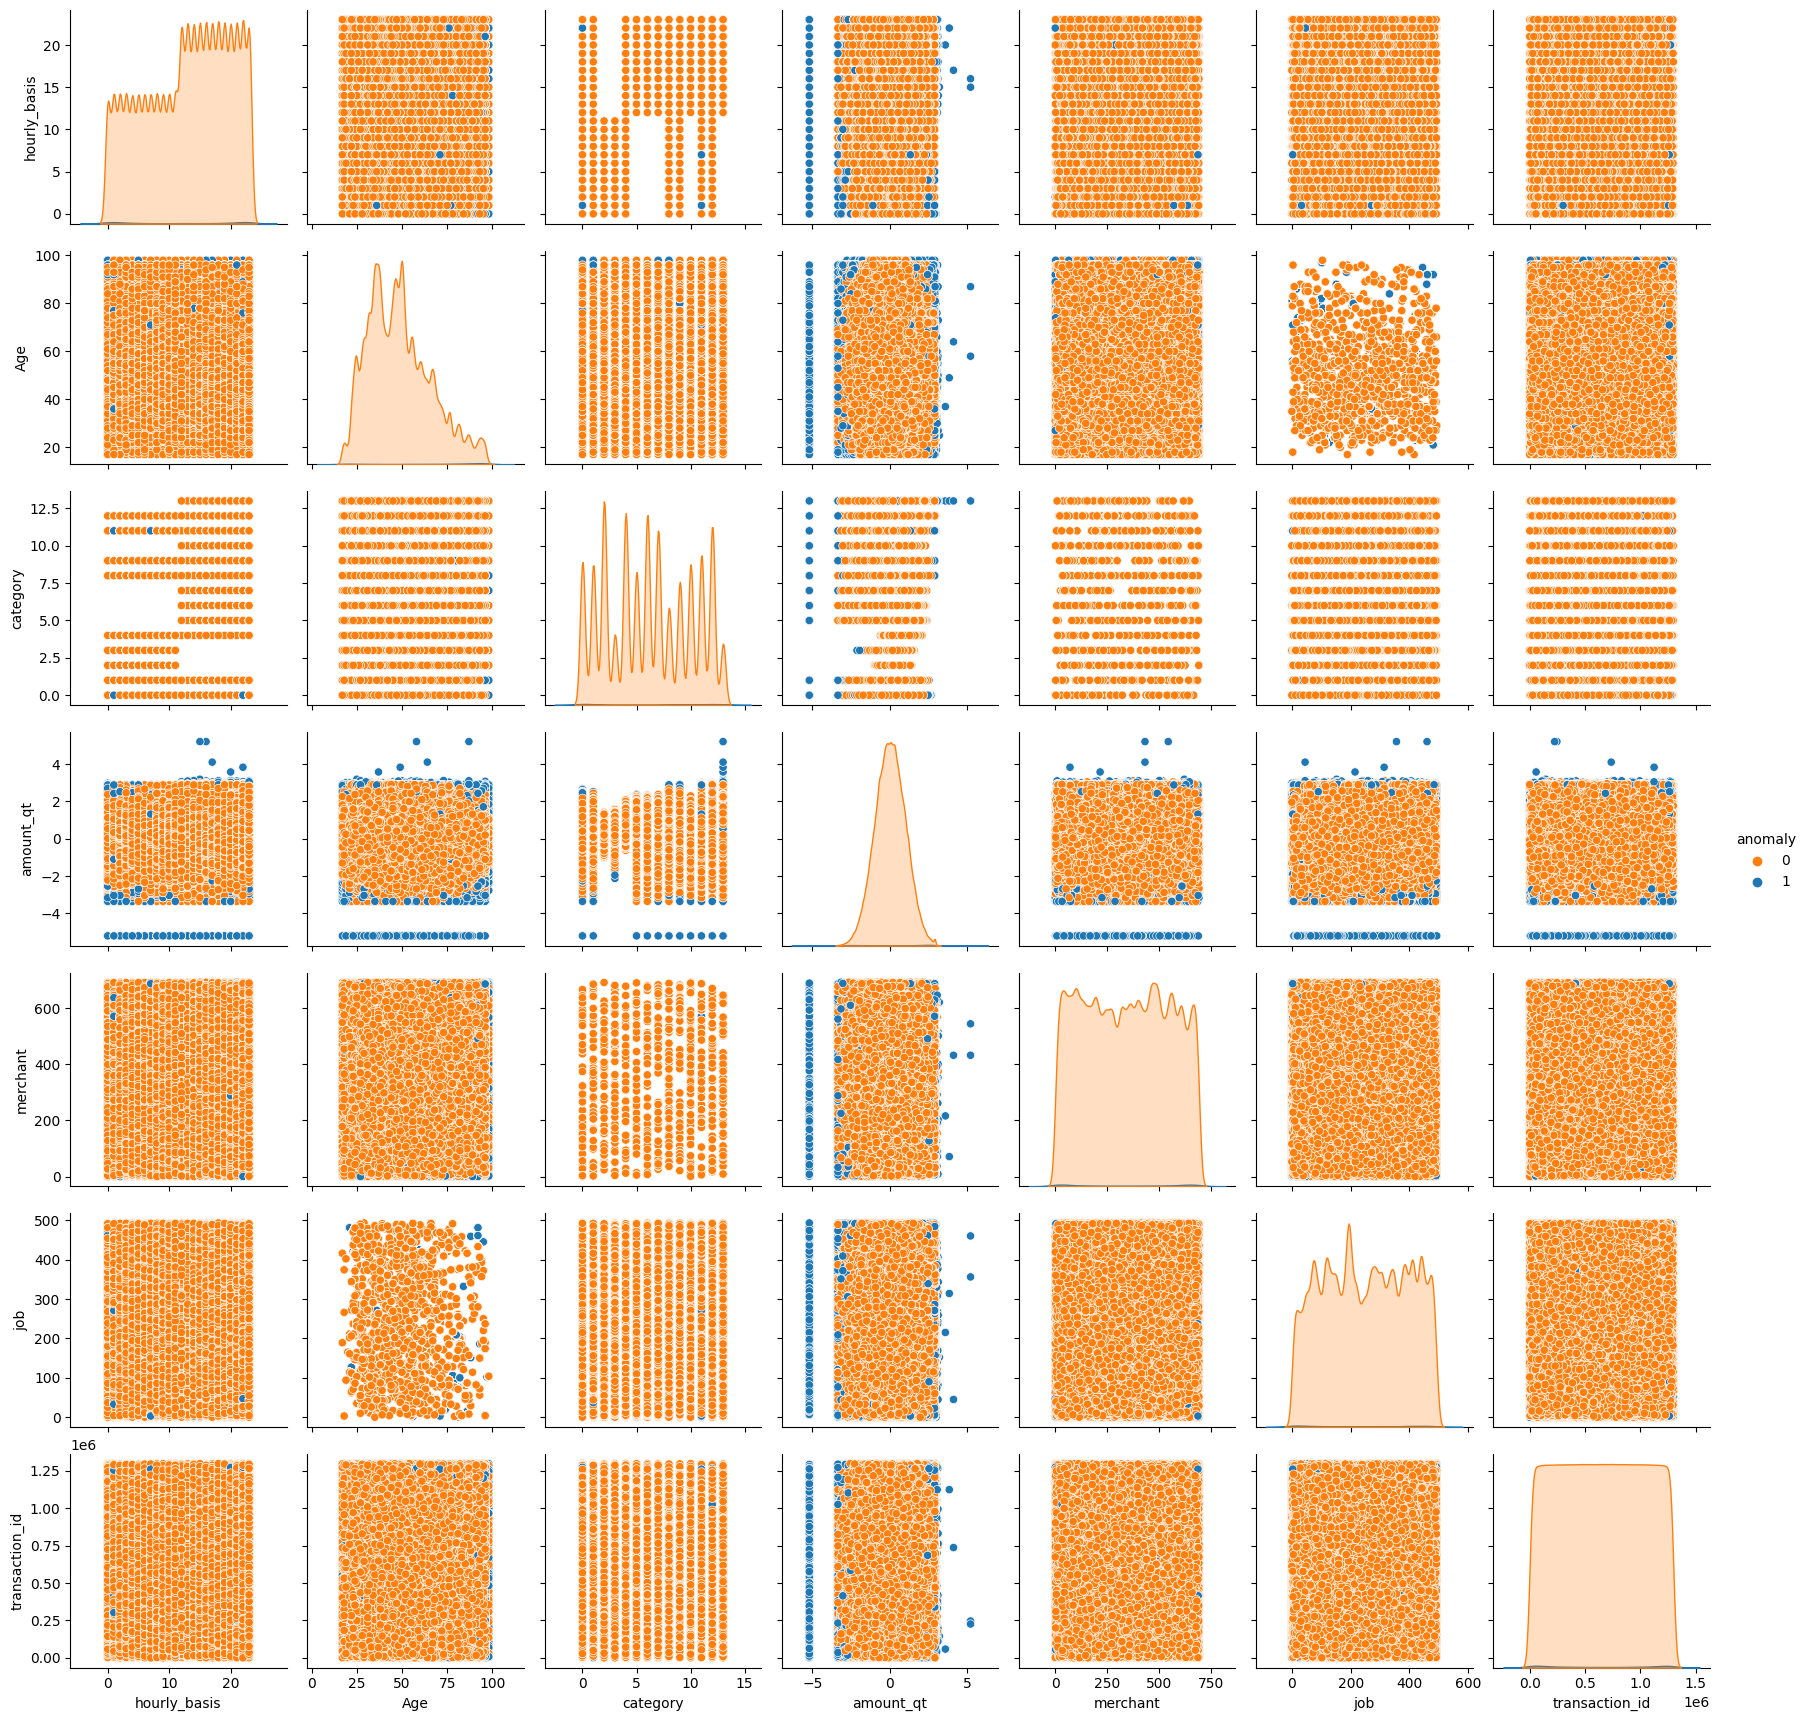

In [30]:
palette = ['#ff7f0e', '#1f77b4']
sns.pairplot(X, vars=anomaly_inputs, hue='anomaly', palette=palette)

**Interpretation:**

-1 indicates the outliers(fraudulent transactions) wherelse 1 = inliers(non-fraudulent transactions

In [16]:
#Reshape the prediction values to 0 for Valid transactions , 1 for Fraud transactions

X.anomaly[X.anomaly == 1] = 0
X.anomaly[X.anomaly == -1] = 1
n_errors = (X.anomaly!= y).sum()

C:\Users\Nima\AppData\Local\Temp\ipykernel_13556\318742275.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.anomaly[X.anomaly == 1] = 0
C:\Users\Nima\AppData\Local\Temp\ipykernel_13556\318742275.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.anomaly[X.anomaly == -1] = 1


In [20]:
X[['anomaly', 'anomaly_scores']]

anomaly  anomaly_scores
0              0        0.037680
1              0        0.080493
2              0        0.022456
3              0        0.105953
4              0        0.081359
...          ...             ...
1296670        0        0.090910
1296671        0        0.073050
1296672        0        0.089746
1296673        0        0.076675
1296674        0        0.069913

[1296675 rows x 2 columns]

Text(0.5, 23.52222222222222, 'Predicted label')

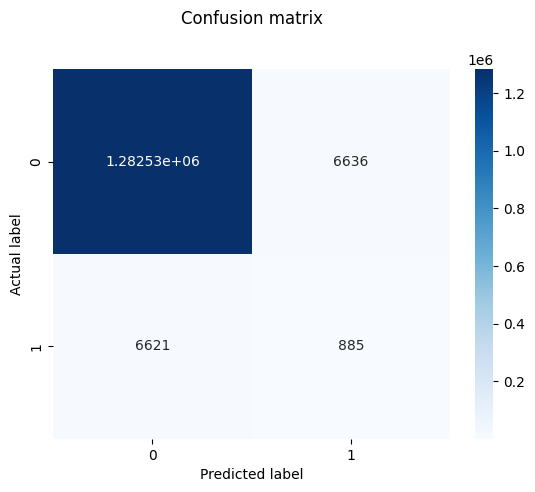

In [17]:
from sklearn import metrics
cf_matrix = metrics.confusion_matrix(y, X.anomaly)
p = sns.heatmap(pd.DataFrame(cf_matrix), annot=True, cmap="Blues" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [21]:
from sklearn.metrics import classification_report,f1_score

# Run Classification Metrics
print("{} : {}".format(IsolationForest ,n_errors))
print("F1 Score :")
print(f1_score(y, X.anomaly, average='weighted'))
print("Classification Report :")
print(classification_report(y,X.anomaly))

<class 'sklearn.ensemble._iforest.IsolationForest'> : 13257
F1 Score :
0.9897812312470597
Classification Report :
              precision    recall  f1-score   support

           0       0.99      0.99      0.99   1289169
           1       0.12      0.12      0.12      7506

    accuracy                           0.99   1296675
   macro avg       0.56      0.56      0.56   1296675
weighted avg       0.99      0.99      0.99   1296675



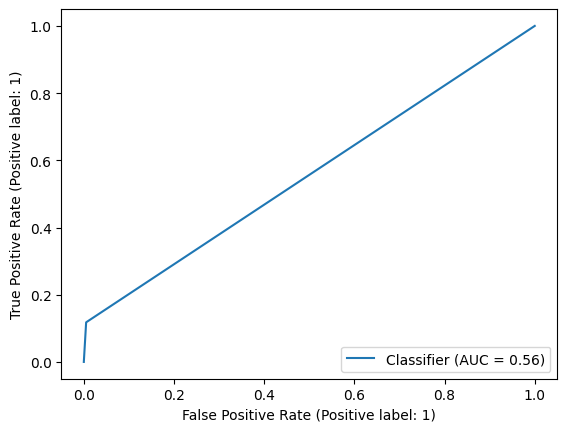

In [22]:
from sklearn.metrics import RocCurveDisplay

RocCurveDisplay.from_predictions(y, X.anomaly)
plt.show()

**Different algorithms can be further explored but I have presented the basic idea of anomaly detection which a part of my fraud payment detection model.**

In [24]:
df_test = pd.read_csv('dftest_cleaned.csv')
df_test.drop('Unnamed: 0', axis=1)
X_test = df_test[['hourly_basis', 'Age', 'category', 'amount_qt', 'merchant', 'job','transaction_id']]
y_test = df_test.is_fraud

In [25]:
np.round(df_test['is_fraud'].value_counts()/len(df_test['is_fraud']) *100,2)

0    99.61
1     0.39
Name: is_fraud, dtype: float64

In [26]:
model_IF = IsolationForest(n_estimators=100, max_samples=len(X_test), contamination=0.0040,random_state=42, verbose=0)
model_IF.fit(X_test)
X_test['anomaly_scores'] = model_IF.decision_function(X_test[anomaly_inputs])
X_test['anomaly']= model_IF.predict(X_test[anomaly_inputs])

C:\Users\Nima\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(
C:\Users\Nima\AppData\Local\Temp\ipykernel_13556\1683517139.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['anomaly_scores'] = model_IF.decision_function(X_test[anomaly_inputs])
C:\Users\Nima\AppData\Local\Temp\ipykernel_13556\1683517139.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test['anom

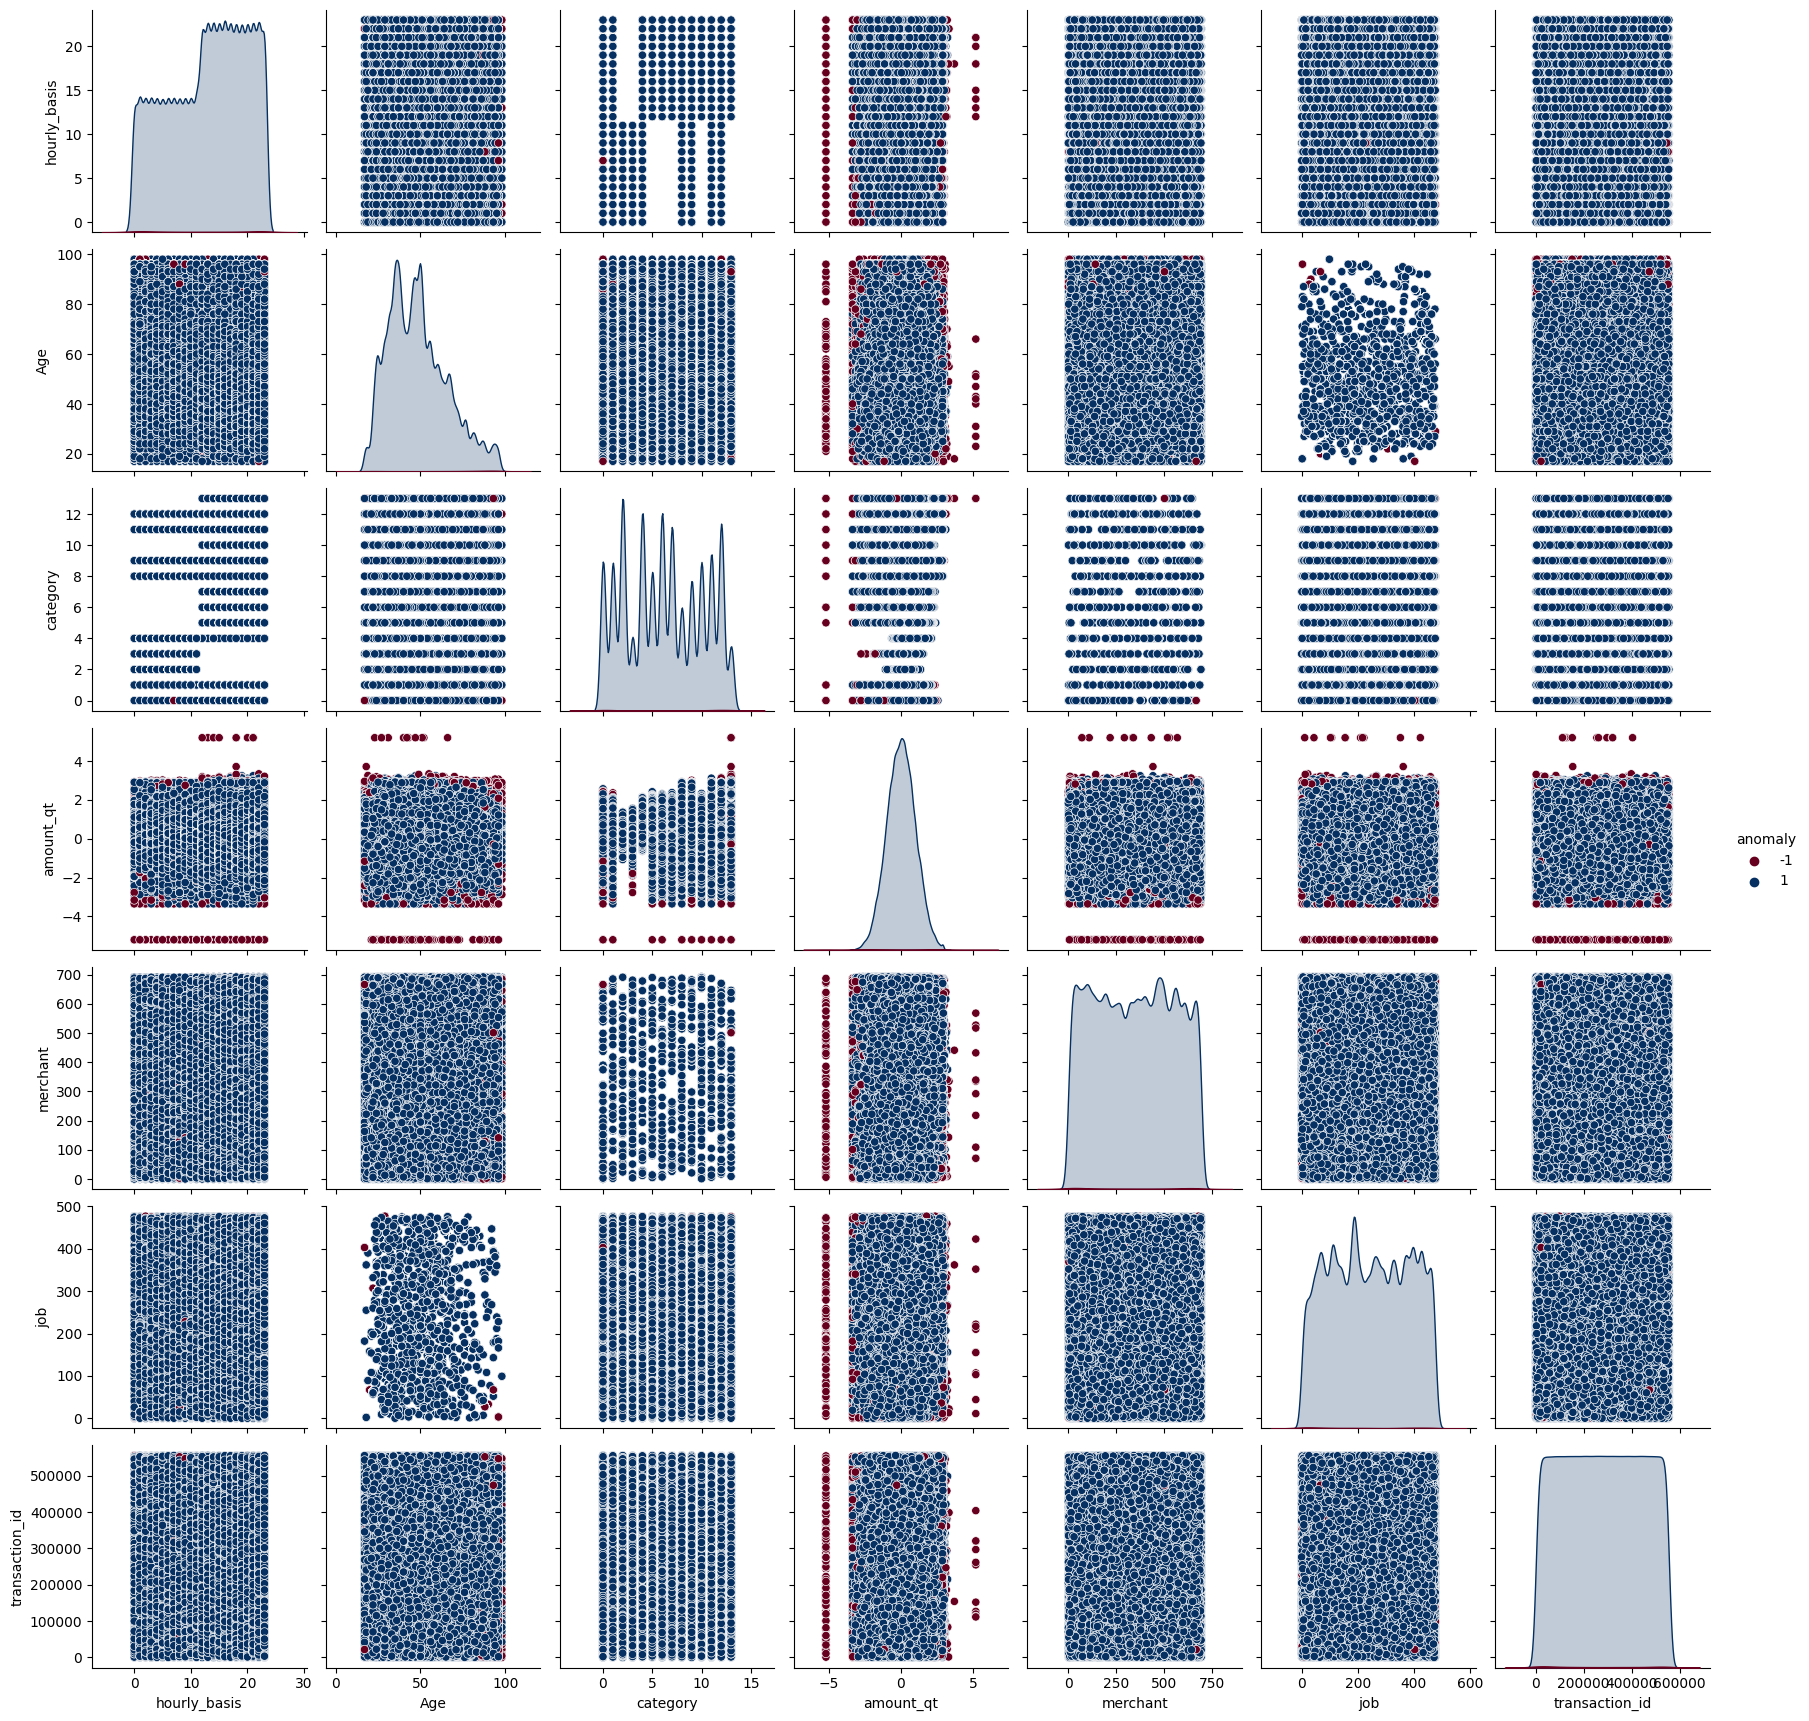

In [29]:
sns.pairplot(X_test, vars=anomaly_inputs, hue='anomaly', palette="RdBu")